In [ ]:
!pip install rdkit

In [ ]:
! gdown 1FXF5p_F5EiCX9kab08thShq4KIMdf5CJ
! gdown 1fcFN2lO_hbPHJ8q52DHMLqLXxo2AeIeq

Downloading...
From: https://drive.google.com/uc?id=1FXF5p_F5EiCX9kab08thShq4KIMdf5CJ
To: /content/1400.xlsx
100% 805k/805k [00:00<00:00, 25.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1fcFN2lO_hbPHJ8q52DHMLqLXxo2AeIeq
To: /content/35000.xlsx
100% 1.78M/1.78M [00:00<00:00, 44.4MB/s]


In [ ]:
import pandas as pd
import numpy as np
import rdkit
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem, Draw, Descriptors
from rdkit.Chem.Draw import IPythonConsole

In [ ]:
df = pd.read_excel('/content/1400.xlsx', sheet_name='Smile-IC50-CC50')
df2 = pd.read_excel('/content/1400.xlsx', sheet_name=1)
df2.drop(labels=['molecule', 'Pictures', 'SMILES', 'IC50, mmg/ml', 'CC50-MDCK, mmg/ml', 'SI'], axis=1, inplace=True)
df = df.join(df2)
df

,Title,"IC50, mmg/ml","CC50-MDCK, mmg/ml",SI,Molecular weight,Hydrogen bond acceptors,Hydrogen bond donors,Polar SA,SMILES,Pictures,...,PSA,#NandO,RuleOfFive,#ringatoms,#in34,#in56,#noncon,#nonHatm,Unnamed: 55,Unnamed: 56
0,1007-Ya-213,2.7,500.0,185.185185,195.307,2,1,32.59,OCC\N=C(\[C@]12C)C[C@@H](C1(C)C)CC2,50.0,...,35.245,2.0,0.0,0.0,0.0,0.0,0.0,14.0,NaN,NaN
1,1007-Ya-213,0.7,447.0,638.571429,195.307,2,1,32.59,OCC\N=C(\[C@]12C)C[C@@H](C1(C)C)CC2,51.0,...,35.245,2.0,0.0,0.0,0.0,0.0,0.0,14.0,NaN,NaN
2,1008-Ya-187,9.9,144.0,14.545455,250.431,1,0,15.60,CCN(CC)CC\N=C(\[C@@]12C)C[C@H](C1(C)C)CC2,52.0,...,17.981,2.0,0.0,0.0,0.0,0.0,0.0,18.0,NaN,NaN
3,1009-As-106,8.3,500.0,60.240964,222.377,1,0,15.60,CN(C)CC\N=C(\[C@@]12C)C[C@H](C1(C)C)CC2,53.0,...,18.821,2.0,0.0,0.0,0.0,0.0,0.0,16.0,NaN,NaN
4,1010-Ya-208,39.4,143.0,3.629442,239.361,2,0,29.54,CN(C)CC(=O)O[C@H]1C[C@H](CC2)C(C)(C)[C@@]12C,54.0,...,36.035,3.0,0.0,0.0,0.0,0.0,0.0,17.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,CHEMBL4251117,7.3,530.6,72.800000,238.330,3,0,39.44,CCCCCCCc1c(OC)c(C)c(=O)oc1,NaN,...,3.000,0.0,0.0,6.0,0.0,6.0,0.0,17.0,NaN,NaN
1464,CHEMBL4217515,3.8,4733.9,1250.000000,427.417,2,1,124.74,COc(cc1)cc(c12)ccc(c2)-c(c3C([O-])=O)c(C([O-])...,NaN,...,7.000,0.0,1.0,22.0,0.0,22.0,0.0,32.0,NaN,NaN
1465,CHEMBL4205814,0.3,4733.9,14285.700000,427.417,2,1,124.74,COc(cc1)cc(c12)ccc(c2)-c(c3C([O-])=O)c(C([O-])...,NaN,...,7.000,0.0,1.0,22.0,0.0,22.0,0.0,32.0,NaN,NaN
1466,CHEMBL4212064,0.7,3662.8,5555.600000,320.304,1,0,89.49,c1ccc(C([O-])=O)c(c1C([O-])=O)-c(c2)ccc(c23)cc...,NaN,...,5.000,0.0,1.0,16.0,0.0,16.0,0.0,24.0,NaN,NaN


In [ ]:
df.drop(labels=['Pictures', 'Title'], axis=1, inplace=True)
df = df.iloc[:,:-2]
df = df.dropna()

In [ ]:
unique_substances = list(df['SMILES'].drop_duplicates())

In [ ]:
new_df = None
for subs in unique_substances:
  subdf = df[df['SMILES'] == subs]
  df.loc[df['SMILES'] == subs, 'IC50, mmg/ml'] = np.array([subdf['IC50, mmg/ml'].mean()]*subdf.shape[0]).reshape(-1, 1)
  df.loc[df['SMILES'] == subs, 'CC50-MDCK, mmg/ml'] = np.array([subdf['CC50-MDCK, mmg/ml'].mean()]*subdf.shape[0]).reshape(-1, 1)
  if new_df is None:
    new_df = df[df['SMILES'] == subs].head(1)
  else:
    new_df = pd.concat([new_df, df[df['SMILES'] == subs].head(1)])

In [ ]:
new_df.drop(labels=['SI'], axis=1, inplace=True)
new_df

,"IC50, mmg/ml","CC50-MDCK, mmg/ml",Molecular weight,Hydrogen bond acceptors,Hydrogen bond donors,Polar SA,SMILES,#stars,#amine,#amidine,...,SAfluorine,SAamideO,PSA,#NandO,RuleOfFive,#ringatoms,#in34,#in56,#noncon,#nonHatm
0,1.700000,473.500000,195.307,2,1,32.59,OCC\N=C(\[C@]12C)C[C@@H](C1(C)C)CC2,2.0,0.0,0.0,...,0.000,0.000,35.245,2.0,0.0,0.0,0.0,0.0,0.0,14.0
2,8.000000,172.850000,250.431,1,0,15.60,CCN(CC)CC\N=C(\[C@@]12C)C[C@H](C1(C)C)CC2,2.0,1.0,0.0,...,0.000,0.000,17.981,2.0,0.0,0.0,0.0,0.0,0.0,18.0
3,9.933333,469.566667,222.377,1,0,15.60,CN(C)CC\N=C(\[C@@]12C)C[C@H](C1(C)C)CC2,3.0,1.0,0.0,...,0.000,0.000,18.821,2.0,0.0,0.0,0.0,0.0,0.0,16.0
4,39.400000,143.000000,239.361,2,0,29.54,CN(C)CC(=O)O[C@H]1C[C@H](CC2)C(C)(C)[C@@]12C,1.0,1.0,0.0,...,0.000,0.000,36.035,3.0,0.0,0.0,0.0,0.0,0.0,17.0
7,18.600000,432.650000,570.997,2,0,24.72,CC1(C)[C@H](CC2)CC(\[C@@]12C)=N/CC[N+](CC)(CC)...,7.0,0.0,0.0,...,0.000,0.000,27.009,4.0,2.0,0.0,0.0,0.0,0.0,41.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,7.300000,530.600000,238.330,3,0,39.44,CCCCCCCc1c(OC)c(C)c(=O)oc1,1.0,0.0,0.0,...,0.000,45.624,3.000,0.0,0.0,6.0,0.0,6.0,0.0,17.0
1464,3.800000,4733.900000,427.417,2,1,124.74,COc(cc1)cc(c12)ccc(c2)-c(c3C([O-])=O)c(C([O-])...,0.0,0.0,0.0,...,0.000,134.921,7.000,0.0,1.0,22.0,0.0,22.0,0.0,32.0
1465,0.300000,4733.900000,427.417,2,1,124.74,COc(cc1)cc(c12)ccc(c2)-c(c3C([O-])=O)c(C([O-])...,0.0,0.0,0.0,...,0.000,132.577,7.000,0.0,1.0,22.0,0.0,22.0,0.0,32.0
1466,0.700000,3662.800000,320.304,1,0,89.49,c1ccc(C([O-])=O)c(c1C([O-])=O)-c(c2)ccc(c23)cc...,0.0,0.0,0.0,...,0.000,100.971,5.000,0.0,1.0,16.0,0.0,16.0,0.0,24.0


In [ ]:
descriptors = {"HeavyAtomCount": Descriptors.HeavyAtomCount,
               "NHOHCount": Descriptors.NHOHCount,
               "NOCount": Descriptors.NOCount,
               "NumHAcceptors": Descriptors.NumHAcceptors,
               "NumHDonors": Descriptors.NumHDonors,
               "NumHeteroatoms": Descriptors.NumHeteroatoms,
               "NumRotatableBonds": Descriptors.NumRotatableBonds,
               "NumValenceElectrons": Descriptors.NumValenceElectrons,
               "NumAromaticRings": Descriptors.NumAromaticRings,
               "NumAliphaticHeterocycles": Descriptors.NumAliphaticHeterocycles,
               "RingCount": Descriptors.RingCount,
               "MW": Descriptors.MolWt,
               "LogP": Descriptors.MolLogP,
               "MR": Descriptors.MolMR,
               "TPSA": Descriptors.TPSA}
for k, f in descriptors.items():
  col = [f(Chem.MolFromSmiles(i)) for i in np.array(new_df['SMILES'])]
  new_df.insert(loc=new_df.shape[1], column=k, value=col)
new_df.shape

[10:02:19] Conflicting single bond directions around double bond at index 55.
[10:02:19]   BondStereo set to STEREONONE and single bond directions set to NONE.
[10:02:20] Conflicting single bond directions around double bond at index 55.
[10:02:20]   BondStereo set to STEREONONE and single bond directions set to NONE.
[10:02:20] Conflicting single bond directions around double bond at index 55.
[10:02:20]   BondStereo set to STEREONONE and single bond directions set to NONE.
[10:02:21] Conflicting single bond directions around double bond at index 55.
[10:02:21]   BondStereo set to STEREONONE and single bond directions set to NONE.
[10:02:21] Conflicting single bond directions around double bond at index 55.
[10:02:21]   BondStereo set to STEREONONE and single bond directions set to NONE.
[10:02:22] Conflicting single bond directions around double bond at index 55.
[10:02:22]   BondStereo set to STEREONONE and single bond directions set to NONE.
[10:02:22] Conflicting single bond direc

(1328, 71)

In [ ]:
new_df

,"IC50, mmg/ml","CC50-MDCK, mmg/ml",Molecular weight,Hydrogen bond acceptors,Hydrogen bond donors,Polar SA,SMILES,#stars,#amine,#amidine,...,NumHeteroatoms,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,NumAliphaticHeterocycles,RingCount,MW,LogP,MR,TPSA
0,1.700000,473.500000,195.307,2,1,32.59,OCC\N=C(\[C@]12C)C[C@@H](C1(C)C)CC2,2.0,0.0,0.0,...,2,2,80,0,0,2,195.306,2.26590,58.6168,32.59
2,8.000000,172.850000,250.431,1,0,15.60,CCN(CC)CC\N=C(\[C@@]12C)C[C@H](C1(C)C)CC2,2.0,1.0,0.0,...,2,5,104,0,0,2,250.430,3.61540,79.3190,15.60
3,9.933333,469.566667,222.377,1,0,15.60,CN(C)CC\N=C(\[C@@]12C)C[C@H](C1(C)C)CC2,3.0,1.0,0.0,...,2,3,92,0,0,2,222.376,2.83520,70.0850,15.60
4,39.400000,143.000000,239.361,2,0,29.54,CN(C)CC(=O)O[C@H]1C[C@H](CC2)C(C)(C)[C@@]12C,1.0,1.0,0.0,...,3,3,98,0,0,2,239.359,2.30600,67.6630,29.54
7,18.600000,432.650000,570.997,2,0,24.72,CC1(C)[C@H](CC2)CC(\[C@@]12C)=N/CC[N+](CC)(CC)...,7.0,0.0,0.0,...,4,16,236,0,0,4,570.995,8.44430,179.0658,24.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,7.300000,530.600000,238.330,3,0,39.44,CCCCCCCc1c(OC)c(C)c(=O)oc1,1.0,0.0,0.0,...,3,7,96,1,0,1,238.327,3.46972,68.7300,39.44
1464,3.800000,4733.900000,427.417,2,1,124.74,COc(cc1)cc(c12)ccc(c2)-c(c3C([O-])=O)c(C([O-])...,0.0,0.0,0.0,...,7,6,160,4,0,4,427.412,2.61690,115.5254,124.74
1465,0.300000,4733.900000,427.417,2,1,124.74,COc(cc1)cc(c12)ccc(c2)-c(c3C([O-])=O)c(C([O-])...,0.0,0.0,0.0,...,7,6,160,4,0,4,427.412,2.61690,115.5254,124.74
1466,0.700000,3662.800000,320.304,1,0,89.49,c1ccc(C([O-])=O)c(c1C([O-])=O)-c(c2)ccc(c23)cc...,0.0,0.0,0.0,...,5,4,120,3,0,3,320.300,1.24240,84.5970,89.49


In [ ]:
new_df = new_df.drop(['SMILES'], axis=1)

In [ ]:
top_features = [(new_df.iloc[:,i].corr(new_df['IC50, mmg/ml']), new_df.columns[i]) for i in range(2, new_df.shape[1])]

In [ ]:
sorted(top_features, key=lambda x: abs(x[0]), reverse=True)[:10]

[(0.35388128743027436, 'PSA'),
 (0.3207923344778001, '#NandO'),
 (-0.28937065964758196, 'SAamideO'),
 (0.27668651249963966, 'PercentHumanOralAbsorption'),
 (-0.18553570092469834, 'NHOHCount'),
 (-0.18163354947859345, 'donorHB'),
 (-0.1815998011548069, '#rotor'),
 (-0.17651360167290386, 'NumHDonors'),
 (-0.17206482443776072, 'QPlogPC16'),
 (0.16729174775860514, 'QPlogBB')]

(array([433., 150., 126.,  54.,  34.,  30.,  28.,  52.,  40.,   8.,  16.,
         20.,   9.,  11.,   9.,  12.,  12.,  13.,  10.,  12.,  14.,  11.,
          9.,   9.,   7.,  25.,   4.,   2.,   2.,   2.,   7.,   5.,   8.,
          4.,   1.,   3.,   1.,   2.,   2.,   4.,   3.,   1.,  10.,   0.,
          0.,   1.,   1.,   1.,   0.,   3.,   4.,   1.,   1.,   1.,   0.,
          1.,   2.,   0.,   1.,   0.,   2.,   0.,   8.,   0.,   0.,   1.,
          0.,   2.,   2.,   0.,   1.,   2.,   0.,   0.]),
 array([  0.,   4.,   8.,  12.,  16.,  20.,  24.,  28.,  32.,  36.,  40.,
         44.,  48.,  52.,  56.,  60.,  64.,  68.,  72.,  76.,  80.,  84.,
         88.,  92.,  96., 100., 104., 108., 112., 116., 120., 124., 128.,
        132., 136., 140., 144., 148., 152., 156., 160., 164., 168., 172.,
        176., 180., 184., 188., 192., 196., 200., 204., 208., 212., 216.,
        220., 224., 228., 232., 236., 240., 244., 248., 252., 256., 260.,
        264., 268., 272., 276., 280., 284., 288., 292.

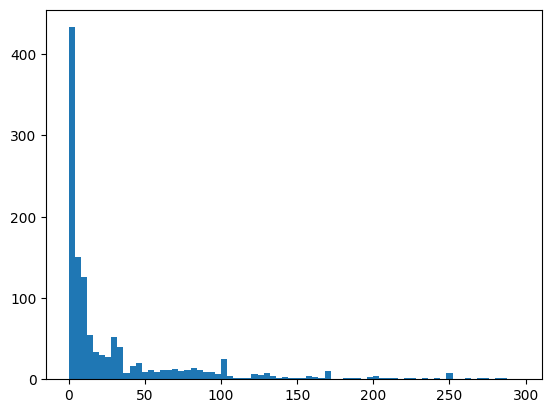

In [ ]:
import matplotlib.pyplot as plt
plt.hist(new_df['IC50, mmg/ml'], bins=range(0, int(new_df['IC50, mmg/ml'].quantile(0.95)), 4))

(array([ 55.,  33.,  86.,  37.,  37.,  26.,  35.,  42.,  61.,  26.,  26.,
         41.,  21.,  21.,  13.,  21.,  13.,  13.,   9.,  20.,  18.,  16.,
         21.,  16.,  15.,  24.,  15.,  17.,  13.,  11.,  19.,   4.,   5.,
          8.,   4.,   3.,   1.,   9.,   4.,   7.,   6.,   3.,   3.,   3.,
          9.,   4.,   4.,   1.,   3.,   2.,  18.,   3.,   2.,   3.,   1.,
          4.,   4.,   2.,   2.,   3.,   3.,   0.,   7.,   1.,   0.,   1.,
          0.,   1.,   2.,   0.,   7.,   1.,   5.,   3.,  13., 245.,   1.,
          0.,   9.,   2.,   2.,   0.]),
 array([  0.,   4.,   8.,  12.,  16.,  20.,  24.,  28.,  32.,  36.,  40.,
         44.,  48.,  52.,  56.,  60.,  64.,  68.,  72.,  76.,  80.,  84.,
         88.,  92.,  96., 100., 104., 108., 112., 116., 120., 124., 128.,
        132., 136., 140., 144., 148., 152., 156., 160., 164., 168., 172.,
        176., 180., 184., 188., 192., 196., 200., 204., 208., 212., 216.,
        220., 224., 228., 232., 236., 240., 244., 248., 252., 256., 260.

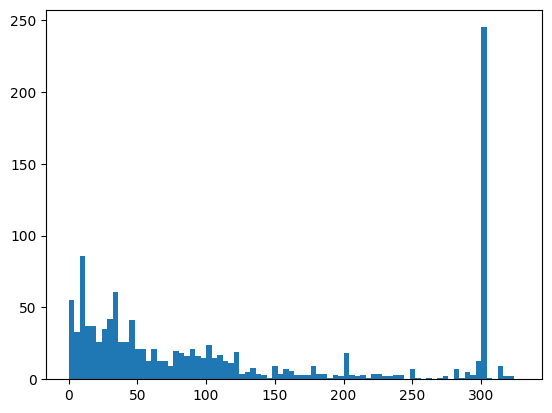

In [ ]:
plt.hist(new_df['CC50-MDCK, mmg/ml'], bins=range(0, int(new_df['CC50-MDCK, mmg/ml'].quantile(0.95)), 4))

In [ ]:
new_df['IC50, mmg/ml'].quantile(0.95)

300.0

In [ ]:
new_df['CC50-MDCK, mmg/ml'].quantile(0.95)

331.9325

In [ ]:
new_df = new_df[new_df['IC50, mmg/ml'] > new_df['IC50, mmg/ml'].quantile(0.25)]
new_df = new_df[new_df['CC50-MDCK, mmg/ml'] < new_df['CC50-MDCK, mmg/ml'].quantile(0.75)]
top_features = [(new_df.iloc[:,i].corr(new_df['IC50, mmg/ml']), new_df.columns[i]) for i in range(2, new_df.shape[1])]
top_features = sorted(top_features, key=lambda x: abs(x[0]), reverse=True)[:10]

(array([ 90., 125., 103.,  40.,  23.,  24.,  17.,  43.,  38.,   7.,  14.,
         16.,   8.,  10.,   4.,   9.,   9.,  10.,   9.,  10.,  12.,   7.,
          3.,   4.,   4.,  17.,   3.,   0.,   0.,   0.,   1.,   0.,   0.,
          1.,   0.,   0.,   0.,   2.,   1.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   1.,   1.,   0.,   2.,   2.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   1.,   0.,   0.]),
 array([  0.,   4.,   8.,  12.,  16.,  20.,  24.,  28.,  32.,  36.,  40.,
         44.,  48.,  52.,  56.,  60.,  64.,  68.,  72.,  76.,  80.,  84.,
         88.,  92.,  96., 100., 104., 108., 112., 116., 120., 124., 128.,
        132., 136., 140., 144., 148., 152., 156., 160., 164., 168., 172.,
        176., 180., 184., 188., 192., 196., 200., 204., 208., 212., 216.,
        220., 224., 228., 232., 236., 240., 244., 248., 252., 256., 260.,
        264., 268., 272., 276., 280., 284., 288., 292.

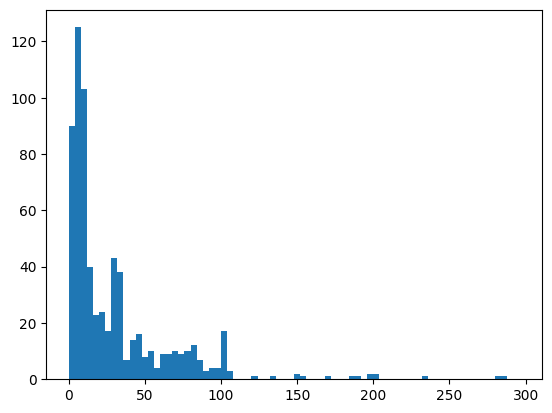

In [ ]:
plt.hist(new_df['IC50, mmg/ml'], bins=range(0, int(max(new_df['IC50, mmg/ml'])), 4))

(array([14., 15., 28., 24., 28., 19., 25., 24., 39., 16., 20., 24., 15.,
        12.,  8., 16.,  9., 12.,  8., 16., 18., 15., 19., 16., 14., 22.,
        15., 12., 10.,  3.,  8.,  4.,  4.,  6.,  4.,  3.,  1.,  8.,  4.,
         7.,  6.,  3.,  3.,  2.,  8.,  4.,  3.,  1.,  1.,  2., 18.,  3.,
         2.,  2.,  1.,  3.,  4.,  2.,  2.,  1.,  3.,  0.,  5.,  1.,  0.,
         1.,  0.,  1.,  2.,  0.,  6.,  1.,  5.,  2.]),
 array([  0.,   4.,   8.,  12.,  16.,  20.,  24.,  28.,  32.,  36.,  40.,
         44.,  48.,  52.,  56.,  60.,  64.,  68.,  72.,  76.,  80.,  84.,
         88.,  92.,  96., 100., 104., 108., 112., 116., 120., 124., 128.,
        132., 136., 140., 144., 148., 152., 156., 160., 164., 168., 172.,
        176., 180., 184., 188., 192., 196., 200., 204., 208., 212., 216.,
        220., 224., 228., 232., 236., 240., 244., 248., 252., 256., 260.,
        264., 268., 272., 276., 280., 284., 288., 292., 296.]),
 <BarContainer object of 74 artists>)

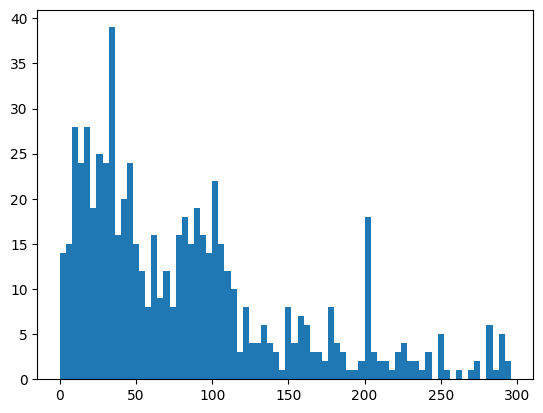

In [ ]:
plt.hist(new_df['CC50-MDCK, mmg/ml'], bins=range(0, int(new_df['CC50-MDCK, mmg/ml'].max()), 4))

In [ ]:
mcc = new_df['IC50, mmg/ml'].mean()
mic = new_df['CC50-MDCK, mmg/ml'].mean()
varcc = new_df['IC50, mmg/ml'].var()
varic = new_df['CC50-MDCK, mmg/ml'].var()
print(mcc, varcc)
print(mic, varic)
print(varcc**0.5)
print(varic**0.5)

30.10901234567901 1459.072448742841
86.8351111111111 5445.981539861524
38.197806857761364
73.79689383613326


In [ ]:
import sklearn
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()
xtrain, xtest, ytrain, ytest = train_test_split(new_df[[v for k, v in top_features]], new_df['IC50, mmg/ml'], train_size=0.7)
model.fit(xtrain, ytrain)

LinearRegression()

In [ ]:
mean_squared_error(ytest, model.predict(xtest))

1733.7550529321497

In [ ]:
top_features_cc = [(new_df.iloc[:,i].corr(new_df['CC50-MDCK, mmg/ml']), new_df.columns[i]) for i in range(2, new_df.shape[1])]
top_features_cc.sort()
top_features_cc = top_features_cc[:10]
top_features_cc

[(-0.14341152094960405, '#in34'),
 (-0.11943737795862425, 'LogP'),
 (-0.1115761447808115, 'NumAromaticRings'),
 (-0.09208788204908541, 'PISA'),
 (-0.08714491137728758, '#amine'),
 (-0.07672030296286456, '#acid'),
 (-0.07578142636252987, 'QPlogKhsa'),
 (-0.06959785848564644, 'QPlogPo/w'),
 (-0.05568084573911821, '#ringatoms'),
 (-0.04826434049420698, 'QPlogPC16')]

In [ ]:
model_cc = LinearRegression()
xxtrain, xxtest, yytrain, yytest = train_test_split(new_df[[v for k, v in top_features_cc]], new_df['CC50-MDCK, mmg/ml'], train_size=0.7)
model_cc.fit(xxtrain, yytrain)

LinearRegression()

In [ ]:
mean_squared_error(yytest, model_cc.predict(xxtest))

4629.972054842077

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
params = {'n_estimators':24,
          'max_depth':5,
          'criterion':'squared_error',
          'learning_rate':0.03,
          'min_samples_leaf':16,
          'min_samples_split':16}
gbr_cc_model = GradientBoostingRegressor(**params)
gbr_cc_model.fit(xxtrain, yytrain)

GradientBoostingRegressor(criterion='squared_error', learning_rate=0.03,
                          max_depth=5, min_samples_leaf=16,
                          min_samples_split=16, n_estimators=24)

In [ ]:
mean_squared_error(yytest, gbr_cc_model.predict(xxtest))

4481.318942925471

In [ ]:
min_error = 10000
n_max = 0
for n in range(10, 200):
  params['n_estimators'] = n
  gbr_cc_model = GradientBoostingRegressor(**params)
  gbr_cc_model.fit(xxtrain, yytrain)
  er = mean_squared_error(yytest, gbr_cc_model.predict(xxtest))
  if min_error > er:
    n_max = n
    min_error = er
print(n_max, min_error)

182 4283.59254881313


In [ ]:
params['n_estimators'] = n_max
min_error = 10000
depth_max = 0
for depth in range(1, 50):
  params['max_depth'] = depth
  gbr_cc_model = GradientBoostingRegressor(**params)
  gbr_cc_model.fit(xxtrain, yytrain)
  er = mean_squared_error(yytest, gbr_cc_model.predict(xxtest))
  if min_error > er:
    depth_max = depth
    min_error = er
print(min_error, depth_max)

4250.3922900890475 4


In [ ]:
params['max_depth'] = depth_max
gbr_ic_model = GradientBoostingRegressor(**params)
gbr_ic_model.fit(xtrain, ytrain)
mean_squared_error(ytest, gbr_ic_model.predict(xtest))

1767.316082972882